In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_pickle('df.pkl')
df

,id_bandera,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,descuento,descuento_pct
49,1,240,7798422850978,SERVILLETAS RAYAS PLATA X20 UDS MESA HOGAR,UNI,GENERICO,3790.0,3.790000e+03,1,UNI,2190.00,Promo A valida desde el 23/04/2025 hasta 30/06...,42.216358,0.011139
111,1,2,7791398072535,MAMADERA SILICONA 140 ML FR 6M,UNI,<NA>,8590.0,8.590000e+03,1,UNI,3990.00,Promo A valida desde el 01/06/2025 hasta 01/08...,53.550644,0.006234
120,1,239,3615004514896,CARGADOR CELULAR POSS 5W BLANCO PSWC 1AWH 18,UNI,<NA>,9900.0,9.900000e+03,1,UNI,4950.00,Promo A valida desde el 24/06/2025 hasta 30/06...,50.000000,0.005051
195,3,341,7790310985274,PALITOS DE MAIZ QUESO CHEETOS X 43 GRS,UNI,CHEETOS,1685.0,3.918600e+03,43,GRS,1432.25,Promo A valida desde el 24/06/2025 hasta 30/06...,15.000001,0.008902
218,1,157,7797087510340,AIRE SPLIT SURREY 3430W 553GFQ1201F,UNI,SURREY,1049000.0,1.049000e+06,1,UNI,950000.00,Promo A valida desde el 24/06/2025 hasta 30/06...,9.437559,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944298,1,50,7799058089107,MUSCULOSA JERSEY ESTAMPADA PP TEX DM,UNI,<NA>,14990.0,1.499000e+04,1,UNI,12990.00,Promo A valida desde el 10/04/2025 hasta 12/07...,13.342229,0.000890
2944343,1,10,7798397480231,SOPORTE DEKKIN DE CELULAR P AUTO 2 EN 1,UNI,<NA>,14900.0,1.490000e+04,1,UNI,8940.00,Promo A valida desde el 24/06/2025 hasta 30/06...,40.000000,0.002685
2944371,1,232,7798128000165,ALFAJOR MAICENA CACHAFAZ CAJA 6 X 76 GRM,UNI,CACHAFAZ,11215.0,2.459430e+04,456,GRM,9532.75,Promo A valida desde el 24/06/2025 hasta 30/06...,15.000001,0.001337
2944388,1,241,0769602431024,MONOPATIN ELECTRICO E RUSH AZUL,UNI,<NA>,299000.0,2.990000e+05,1,UNI,224000.00,Promo A valida desde el 24/06/2025 hasta 30/06...,25.083614,0.000084


1- Preprocesamiento y limpieza del dataset:

- 1- Realizar una limpieza general del dataset, eliminando o corrigiendo datos inconsistentes o irrelevantes.
- 2- Realizar el split del dataset (ej: train y test).
- 3- Identificar y tratar los valores faltantes en el dataset.
- 4- Detectar y manejar los outliers utilizando técnicas estadísticas o visuales apropiadas.
- 5- Escalar y / o normalizar los features.

2- Feature engineering:

- 1- Crear nuevos features en caso de ser necesario. Justificar.
- 2- Aplicar técnicas de conversión de variables: codificación, discretización.
- 3- Analizar el balance/desbalance de clases (en el caso que se trate de un problema de clasifi cación).
- 4- Proponer y aplicar mecanismos de balance en caso de ser necesario y justifi car la selección.

### 1.1 Realizar una limpieza general del dataset, eliminando o corrigiendo datos inconsistentes o irrelevantes.

In [3]:
df.drop(columns=['descuento_pct'], inplace=True)
df['productos_marca'] = df['productos_marca'].fillna('N/A')
df

,id_bandera,id_sucursal,id_producto,productos_descripcion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,descuento
49,1,240,7798422850978,SERVILLETAS RAYAS PLATA X20 UDS MESA HOGAR,UNI,GENERICO,3790.0,3.790000e+03,1,UNI,2190.00,Promo A valida desde el 23/04/2025 hasta 30/06...,42.216358
111,1,2,7791398072535,MAMADERA SILICONA 140 ML FR 6M,UNI,N/A,8590.0,8.590000e+03,1,UNI,3990.00,Promo A valida desde el 01/06/2025 hasta 01/08...,53.550644
120,1,239,3615004514896,CARGADOR CELULAR POSS 5W BLANCO PSWC 1AWH 18,UNI,N/A,9900.0,9.900000e+03,1,UNI,4950.00,Promo A valida desde el 24/06/2025 hasta 30/06...,50.000000
195,3,341,7790310985274,PALITOS DE MAIZ QUESO CHEETOS X 43 GRS,UNI,CHEETOS,1685.0,3.918600e+03,43,GRS,1432.25,Promo A valida desde el 24/06/2025 hasta 30/06...,15.000001
218,1,157,7797087510340,AIRE SPLIT SURREY 3430W 553GFQ1201F,UNI,SURREY,1049000.0,1.049000e+06,1,UNI,950000.00,Promo A valida desde el 24/06/2025 hasta 30/06...,9.437559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944298,1,50,7799058089107,MUSCULOSA JERSEY ESTAMPADA PP TEX DM,UNI,N/A,14990.0,1.499000e+04,1,UNI,12990.00,Promo A valida desde el 10/04/2025 hasta 12/07...,13.342229
2944343,1,10,7798397480231,SOPORTE DEKKIN DE CELULAR P AUTO 2 EN 1,UNI,N/A,14900.0,1.490000e+04,1,UNI,8940.00,Promo A valida desde el 24/06/2025 hasta 30/06...,40.000000
2944371,1,232,7798128000165,ALFAJOR MAICENA CACHAFAZ CAJA 6 X 76 GRM,UNI,CACHAFAZ,11215.0,2.459430e+04,456,GRM,9532.75,Promo A valida desde el 24/06/2025 hasta 30/06...,15.000001
2944388,1,241,0769602431024,MONOPATIN ELECTRICO E RUSH AZUL,UNI,N/A,299000.0,2.990000e+05,1,UNI,224000.00,Promo A valida desde el 24/06/2025 hasta 30/06...,25.083614


In [4]:
#ahora veremos que cantidad de nulos tendremos en cada columna:
# --- La línea de código clave ---
conteo_nulos = df.isnull().sum()

# Imprimir el resultado
print("Conteo de valores nulos por columna:")
conteo_nulos

Conteo de valores nulos por columna:


id_bandera                              0
id_sucursal                             0
id_producto                             0
productos_descripcion                   0
productos_unidad_medida_presentacion    0
productos_marca                         0
productos_precio_lista                  0
productos_precio_referencia             0
productos_cantidad_referencia           0
productos_unidad_medida_referencia      0
productos_precio_unitario_promo1        0
productos_leyenda_promo1                0
descuento                               0
dtype: int64

**Una aclaración a cerca de los valores 'N/A' de productos_marca.**

Dada la características del dataframe e interpretando un poco el negocio, suponemos que esos valores corresponden a marcas poco conocidas, con poca cantidad de productos, en fin, sin peso en el supermercado, por lo tanto, creemos que la manera correcta de tratarlos es imputando el valor 'N/A'.


_Podriamos extraer la fecha de la promocion, solo eso en una columna y agrupar los tipos de fecha, es decir en una columna poner los dias de duracion de la promocion._


Los datos ya estan limpios y el dataset tiene solo información relevante.

**Elección de las features:**

El dataframe tiene muchas caracteristicas y consideramos que elegir las que creemos mas representativas, mejorará el funcionamiento del modelo. 





In [5]:
df.columns

Index(['id_bandera', 'id_sucursal', 'id_producto', 'productos_descripcion',
       'productos_unidad_medida_presentacion', 'productos_marca',
       'productos_precio_lista', 'productos_precio_referencia',
       'productos_cantidad_referencia', 'productos_unidad_medida_referencia',
       'productos_precio_unitario_promo1', 'productos_leyenda_promo1',
       'descuento'],
      dtype='object')

In [6]:
#columnas a elegir:

features = ['id_bandera', 'productos_marca',
       'productos_precio_lista',
       'descuento']


df = df[features].copy()
df

,id_bandera,productos_marca,productos_precio_lista,descuento
49,1,GENERICO,3790.0,42.216358
111,1,N/A,8590.0,53.550644
120,1,N/A,9900.0,50.000000
195,3,CHEETOS,1685.0,15.000001
218,1,SURREY,1049000.0,9.437559
...,...,...,...,...
2944298,1,N/A,14990.0,13.342229
2944343,1,N/A,14900.0,40.000000
2944371,1,CACHAFAZ,11215.0,15.000001
2944388,1,N/A,299000.0,25.083614




Por que **NO** elegimos estas features?:

principalmente porque son variables categóricas y para usarlas debemos usar one hot encoding, y al hacerlo, agregamos una alta dimensionalidad al dataframe. 

- 'id_sucursal': son muchas sucursales, usar un onehot encoding para esto agregaria mucha informacion. Ademas, informacion de la sucursal puede obtenerse de id_bandera. id_bandera tiene una cardinalidad mucho mas baja (ver descripcion de id_bandera del tp1).

- 'id_producto', 'productos_descripcion': son columnas con una cardinalidad extremadamente alta. al igual que como el caso anterior, creemos que la marca representa igualmente a los productos y tiene una cardinalidad bastante menor.

- 'productos_unidad_medida_presentacion', 'productos_precio_referencia', 'productos_cantidad_referencia', 'productos_unidad_medida_referencia': son datos irrelevantes para el objetivo del modelo. 

- 'productos_precio_unitario_promo1': la eliminamos ya que en descuento tenemos informacion del porcentaje de descuento respecto al precio de lista. Recordar que 'descuento' = 100* (1- productos_precio_unitario_promo1/productos_precio_lista).



### 1.2- Realizar el split del dataset (ej: train y test)


Primero deberemos separar entre las columnas features y la target:

In [7]:
df.columns

Index(['id_bandera', 'productos_marca', 'productos_precio_lista', 'descuento'], dtype='object')

In [8]:
y = df[['descuento']]
X = df.drop(columns=['descuento'])
#separar en train y test:

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
    )

### 1.4- Detectar y manejar los outliers utilizando técnicas estadísticas o visuales apropiadas.

Ya se hizo un análisis con técnicas visuales en el TP1. 

Se encuentran ouliers en la columna precio (y todas las columnas relacionadas con precio) y en la columna descuento. Como lo que queremos es encontrar predicciones en el **porcentaje** de descuento, los valores ouliers en precio no deberian afectar al porcentaje de descuento. 

Por otro lado, viendo el gráfico de descuento en función del precio de lista (ver TP1), vemos que los descuentos mas agresivos (cercanos al 80 %) se dan para productos de bajo costo. 

Por lo tanto consideramos que para que el comportamiento del modelo sea mas presiso, y a apuntar a tener menor error, nos concentraremos en eliminar valores atipicos de descuentos. 



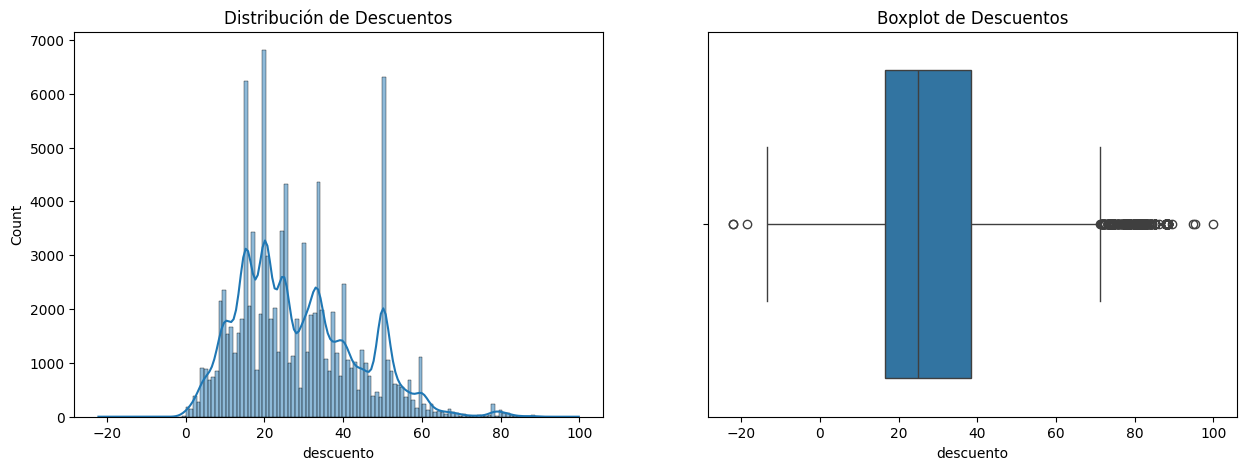

count    104107.000000
mean         28.522532
std          15.098448
min         -22.183407
25%          16.672224
50%          25.031290
75%          38.491146
max          99.874092
Name: descuento, dtype: float64


In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma y KDE (Estimación de Densidad de Kernel)
sns.histplot(y_train['descuento'], kde=True, ax=axes[0])
axes[0].set_title('Distribución de Descuentos')

# Boxplot
sns.boxplot(x=y_train['descuento'], ax=axes[1])
axes[1].set_title('Boxplot de Descuentos')

plt.show()

# También mira las estadísticas descriptivas
print(y_train['descuento'].describe())

La distribución del porcentaje de descuento tiene parecido aproximado a una normal, pero con algo de sesgo a la derecha. Ademas, tiene picos en algunos valores particulares de descuento como 20 %, 50 %, etc... Tambien ver que hay algunos valores con descuento negativo. Eso claramente es un error. Por otro lado, hay productos con descuento muy agresivo como por ejemplo 80 %. Seguramente (aunque podria indagarse un poco mas) eso corresponde a un 80 % de descuento en la segunda unidad y eso no es un descuento real por producto, sino un descuento llevando mas de una unidad.

Por eso, decidimos que la mejor estrategia es aplicar la técnica de la eliminación de valores ouliers con el método del rango intercuartil (sobre el método z score) con un valor k de 1.5 y con un limite inferior de 0.

--- Calculando límites en datos limpios ---
Q1 calculado sobre descuentos >= 0: 16.67
Q3 calculado sobre descuentos >= 0: 38.49
Límite inferior estadístico (Q1 - 1.5*IQR): -16.06

Límite inferior final (aplicando max(0, ...)): 0.00
Límite superior final (Q3 + 1.5*IQR): 71.22
----------------------------------------
--- Resultados del Filtrado ---
Tamaño original de X_train/y_train: 104107
Número de filas conservadas: 103356

Forma final de X_train: (103356, 3)
Forma final de y_train: (103356, 1)

y_train después de la limpieza:
         descuento
1691133  11.135858
266771    0.409277
2466552  40.004002
2554200  20.930233
2765889  62.515629
...            ...
2898611  41.200706
2346001  56.285179
19394    37.170921
359783   16.672224
2759401  16.387960

[103356 rows x 1 columns]

Generando visualizaciones del conjunto de entrenamiento limpio...


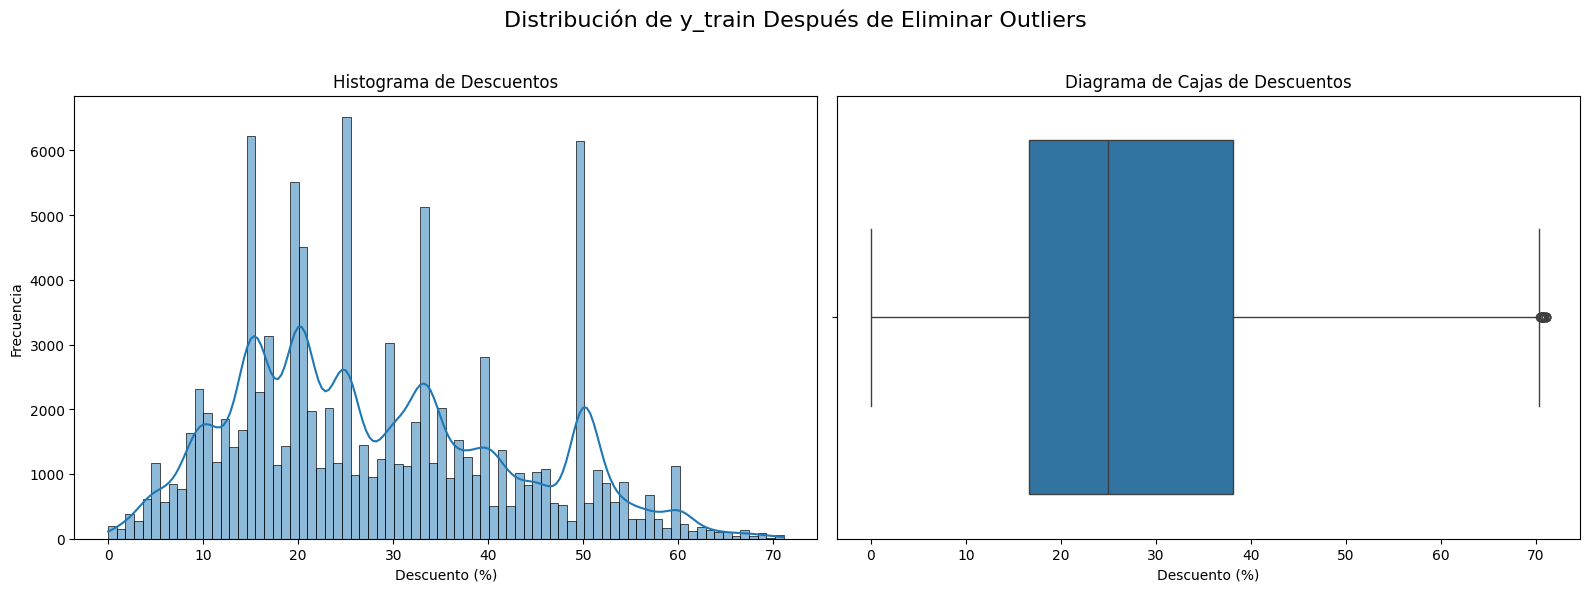

In [10]:
# --- 1. Filtrar descuentos negativos para el cálculo de cuartiles ---
# Creamos una Serie temporal SOLO con los valores válidos (>= 0) de y_train
# para CALCULAR los límites, no para filtrar todavía.
y_train_positivos = y_train[y_train['descuento'] >= 0]['descuento']

print("--- Calculando límites en datos limpios ---")
if y_train_positivos.empty:
    print("No hay descuentos no negativos para calcular los límites.")
else:
    # --- 2. Calcular Q1, Q3 e IQR sobre los datos limpios ---
    Q1 = y_train_positivos.quantile(0.25)
    Q3 = y_train_positivos.quantile(0.75)
    IQR = Q3 - Q1
    k = 1.5

    # --- 3. Calcular los límites finales para la eliminación (Lógica Mejorada) ---
    limite_inferior_estadistico = Q1 - k * IQR
    limite_inferior_final = max(0, limite_inferior_estadistico)
    limite_superior_final = Q3 + k * IQR

    print(f"Q1 calculado sobre descuentos >= 0: {Q1:.2f}")
    print(f"Q3 calculado sobre descuentos >= 0: {Q3:.2f}")
    print(f"Límite inferior estadístico (Q1 - 1.5*IQR): {limite_inferior_estadistico:.2f}")

    print(f"\nLímite inferior final (aplicando max(0, ...)): {limite_inferior_final:.2f}")
    print(f"Límite superior final (Q3 + 1.5*IQR): {limite_superior_final:.2f}")
    print("-" * 40)

    # --- 4. Identificar los índices a conservar en el DataFrame ORIGINAL ---
    indices_a_conservar = y_train[
        (y_train['descuento'] >= limite_inferior_final) & 
        (y_train['descuento'] <= limite_superior_final)
    ].index

    # --- 5. Filtrar AMBOS, X_train e y_train, usando los índices ---
    X_train_final = X_train.loc[indices_a_conservar]
    y_train_final = y_train.loc[indices_a_conservar]

    print("--- Resultados del Filtrado ---")
    print(f"Tamaño original de X_train/y_train: {len(y_train)}")
    print(f"Número de filas conservadas: {len(indices_a_conservar)}")
    
    print("\nForma final de X_train:", X_train_final.shape)
    print("Forma final de y_train:", y_train_final.shape)
    
    print("\ny_train después de la limpieza:")
    print(y_train_final)

    # --- 6. VISUALIZAR EL RESULTADO (CON HISTOGRAMA Y BOXPLOT) ---
    # ¡Esta es la sección modificada!
    print("\nGenerando visualizaciones del conjunto de entrenamiento limpio...")
    
    # Creamos una figura con dos subplots, uno al lado del otro
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Distribución de y_train Después de Eliminar Outliers', fontsize=16)

    # Gráfico 1: Histograma y Distribución de Densidad (KDE)
    sns.histplot(data=y_train_final, x='descuento', kde=True, ax=axes[0])
    axes[0].set_title('Histograma de Descuentos')
    axes[0].set_xlabel('Descuento (%)')
    axes[0].set_ylabel('Frecuencia')

    # Gráfico 2: Diagrama de Cajas (Boxplot)
    sns.boxplot(data=y_train_final, x='descuento', ax=axes[1])
    axes[1].set_title('Diagrama de Cajas de Descuentos')
    axes[1].set_xlabel('Descuento (%)')

    # Ajustamos el layout para que todo se vea bien y mostramos la figura
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [11]:
X_train = X_train_final.copy()
y_train = y_train_final.copy()

In [14]:
X_train

,id_bandera,productos_marca,productos_precio_lista
1691133,1,AIWA,449000.0
266771,2,PALADINI,2199.0
2466552,1,N/A,99990.0
2554200,1,N/A,43000.0
2765889,1,N/A,39990.0
...,...,...,...
2898611,1,MAISTO,16990.0
2346001,1,CARREFOUR HOME,15990.0
19394,2,ELEGANTE,2545.0
359783,1,N/A,29990.0


### 1.5 Escalar y / o normalizar los features.

In [18]:
# --- 1. Crear e Instanciar el Escalador ---
# Usamos MinMaxScaler para escalar entre 0 y 1
scaler = MinMaxScaler()

# --- 2. Aprender los parámetros de X_train (el paso .fit()) ---
# Le pasamos la columna como un DataFrame (con doble corchete)
scaler.fit(X_train[['productos_precio_lista']])

# Puedes ver los parámetros que aprendió (el mínimo y el máximo)
print(f"Mínimo aprendido de 'productos_precio_lista' en X_train: {scaler.data_min_[0]:.2f}")
print(f"Máximo aprendido de 'productos_precio_lista' en X_train: {scaler.data_max_[0]:.2f}")
print("-" * 40)

# --- 3. Transformar los datos ---
# Creamos copias para evitar el SettingWithCopyWarning
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled['productos_precio_lista'] = scaler.transform(X_train[['productos_precio_lista']])
X_test_scaled['productos_precio_lista'] = scaler.transform(X_test[['productos_precio_lista']])

# --- 4. Verificar el resultado ---
print("\n--- X_train DESPUÉS de escalar 'productos_precio_lista' ---")
print(X_train_scaled)
# Verás que el valor mínimo de la columna original (50) ahora es 0.0
# y el valor máximo (300) ahora es 1.0.

print("\n--- X_test DESPUÉS de escalar 'productos_precio_lista' ---")
print(X_test_scaled)

# Comprobemos que los valores en X_train_scaled están perfectamente entre 0 y 1.
print("\nVerificación en la columna escalada de X_train:")
print(f"Nuevo mínimo: {X_train_scaled['productos_precio_lista'].min():.2f}") # Debería ser 0.0
print(f"Nuevo máximo: {X_train_scaled['productos_precio_lista'].max():.2f}") # Debería ser 1.0

Mínimo aprendido de 'productos_precio_lista' en X_train: 109.00
Máximo aprendido de 'productos_precio_lista' en X_train: 7349000.00
----------------------------------------

--- X_train DESPUÉS de escalar 'productos_precio_lista' ---
         id_bandera productos_marca  productos_precio_lista
1691133           1            AIWA                0.061083
266771            2        PALADINI                0.000284
2466552           1             N/A                0.013591
2554200           1             N/A                0.005836
2765889           1             N/A                0.005427
...             ...             ...                     ...
2898611           1          MAISTO                0.002297
2346001           1  CARREFOUR HOME                0.002161
19394             2        ELEGANTE                0.000331
359783            1             N/A                0.004066
2759401           1           ADLER                0.000392

[103356 rows x 3 columns]

--- X_test DESPUÉS

## 2 Feature engineering

Durante la primera parte del trabajo se fueron haciendo algunas de las tareas propuestas dentro de feature engineering, asique esta parte en esta segunda parte del TP no se realizara.

### 2.1- Crear nuevos features en caso de ser necesario. Justificar.

En el tp1 se creo la variable descuento que es el porcentaje de descunto del producto:



$$
\text{descuento} = 100 \times \left( 1 - \frac{\text{precio\_promo}}{\text{precio\_lista}} \right)
$$



- 3- Analizar el balance/desbalance de clases (en el caso que se trate de un problema de clasifi cación).
- 4- Proponer y aplicar mecanismos de balance en caso de ser necesario y justifi car la selección.

### 2.2- Aplicar técnicas de conversión de variables: codificación, discretización

Se aplicará one hot encoding para las variables categoricas: